In [1]:
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.agents import AssistantAgent
from dotenv import load_dotenv
from autogen_core.models import UserMessage
from autogen_agentchat.ui import Console

In [2]:

load_dotenv()
import os
GEMINI_API_KEY=os.getenv('GEMINI_API_KEY')
model_client = OpenAIChatCompletionClient(
    model="gemini-2.5-flash",
    api_key=GEMINI_API_KEY,
)

requests.get("").content will return raw binary data

Image.open() expects either filename or a file like object

we can use BytesIO to create file like object

its like creating a fake file in memory that PIL can read from

In [5]:
from PIL import Image
from io import BytesIO
import requests
raw_data=requests.get("https://picsum.photos/300/200").content
print(raw_data)


b'\xff\xd8\xff\xe1\x00\xdeExif\x00\x00II*\x00\x08\x00\x00\x00\x06\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00V\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00^\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00\x07\x00\x00\x90\x07\x00\x04\x00\x00\x000210\x01\x91\x07\x00\x04\x00\x00\x00\x01\x02\x03\x00\x86\x92\x07\x00\x16\x00\x00\x00\xc0\x00\x00\x00\x00\xa0\x07\x00\x04\x00\x00\x000100\x01\xa0\x03\x00\x01\x00\x00\x00\xff\xff\x00\x00\x02\xa0\x04\x00\x01\x00\x00\x00,\x01\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00\xc8\x00\x00\x00\x00\x00\x00\x00ASCII\x00\x00\x00Picsum ID: 495\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0

In [6]:

file_like = BytesIO(raw_data)
# now file_like behaves like an opened file


In [7]:
file_like

In [9]:
image=Image.open(file_like)  
# ✅ Works: PIL thinks it's opening a file


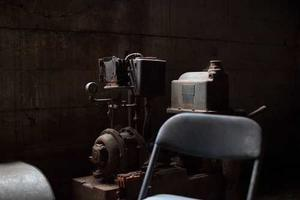

In [10]:
image

In [14]:
from autogen_core import Image as AGImage
#  Wrap it into Autogen’s Image
# AGImage is a wrapper class it take image and turn it to a autogen compatile multimodal object
#so that ai model know that it will deal with an image
img = AGImage(image)


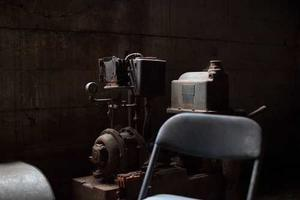

In [15]:
img

In [17]:
from autogen_agentchat.messages import MultiModalMessage
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
agent=AssistantAgent(
    name="jarvis",
    model_client=model_client,
    system_message="you are a helpfull assistant agent"
)

result = await agent.run(task=multi_modal_message)
print(result.messages[-1].content)

This image depicts a dimly lit, somber scene featuring old industrial machinery and a folding chair. The overall mood is dark and somewhat mysterious due to the dramatic lighting.

In the midground, the primary focus is on two distinct pieces of antiquated machinery, sitting on what appears to be a light brown, possibly wooden or rusted metal base. The machine on the left is complex, with a dark, intricate structure, visible pipes, levers, and a circular pressure gauge. Below it, a large, rounded, rusty component, perhaps a motor or pump, is prominent. To its right, another, more rectangular machine with a lighter metallic finish (silver/grey) is visible, featuring some controls or panels on its front face. Both machines show signs of age, wear, and rust.

In the immediate foreground, to the right, a dark blue or grey folding chair is partially visible, with its backrest and the top edge of its seat facing the viewer. It is slightly out of focus. On the far left foreground, a blurry, r

In [ ]:
!pip install -U "autogen-ext[langchain]"


In [20]:
%pip install -qU duckduckgo-search langchain-community

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gtts 2.5.4 requires click<8.2,>=7.1, but you have click 8.2.1 which is incompatible.
livekit-agents 1.2.7 requires av>=14.0.0, but you have av 13.1.0 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
videosdk 0.2.0 requires pillow==10.4.0, but you have pillow 11.3.0 which is incompatible.
videosdk 0.2.0 requires requests<2.32.0,>=2.3.1, but you have requests 2.32.5 which is incompatible.
ydata-profiling 4.8.3 requires numpy<2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.


In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun
from autogen_ext.tools.langchain import LangChainToolAdapter


search = DuckDuckGoSearchRun()
tool = LangChainToolAdapter(search)



In [ ]:
agent=AssistantAgent(
    name="jarvis",
    model_client=model_client,
    system_message="you are a helpfull ai assistant. use the tool when needed.",
    tools=[tool]

)